In [47]:
'''
<br>
@Author: Venkatesh <br>
@Date: 2024-11-15  <br>
@Last Modified by: Venkatesh <br>
@Last Modified time: 2024-11-15 <br>
@Title: multiple linear regression <br>

'''

'\n<br>\n@Author: Venkatesh <br>\n@Date: 2024-11-15  <br>\n@Last Modified by: Venkatesh <br>\n@Last Modified time: 2024-11-15 <br>\n@Title: multiple linear regression <br>\n\n'

1. Build a predictive linear regression model for given dataset, given temperature,
humidity, wind speed , wind bearing, visibility, pressure predict apparent
temperature
https://drive.google.com/open?id=1WsJxbsh51SL1UhT0xEvNynZTKy4nOwLM

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import os

Reading the data

In [49]:
weather_data=pd.read_csv("D:\ML\weatherHistory.csv")

In [50]:
print(weather_data.info())
print(weather_data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB
None
       Temperature (C)  Apparent Temperature (C)      Humidity  

Handling missing values

In [51]:
weatherData = weather_data.dropna(subset=['Humidity','Apparent Temperature (C)'])

In [ ]:
# convert into decimal values scalling humadity column
if weatherData.Humidity.max() > 1:
    weatherData['Humidity'] = weatherData['Humidity'] / 100

Define features (X) and target (Y)

In [53]:
X = weatherData[['Humidity','Temperature (C)', 'Wind Speed (km/h)' , 'Visibility (km)','Pressure (millibars)']]  # Feature  (independent)
Y = weatherData['Apparent Temperature (C)'] # Target (dependent)

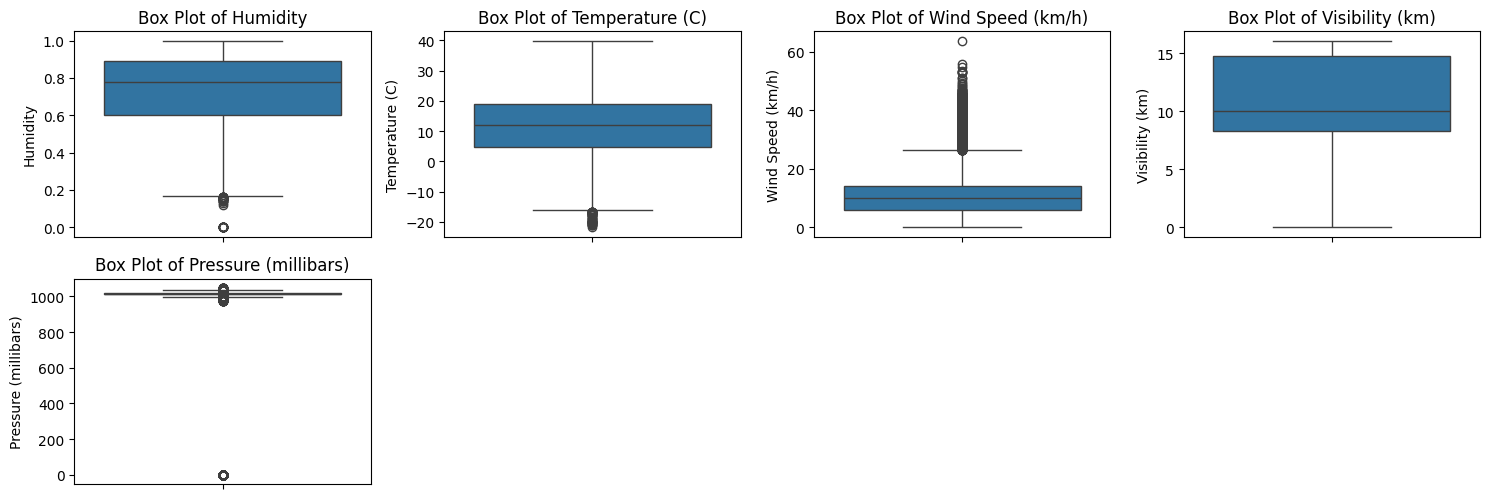

In [54]:
plt.figure(figsize=(15, 10))

# Plotting box plots for each numerical column
for i, column in enumerate(X.columns):
    plt.subplot(4, 4, i + 1)  
    sns.boxplot(y=X[column])  
    plt.title(f'Box Plot of {column}')

plt.tight_layout()
plt.show()  # in this we are setting limit of independent colmns

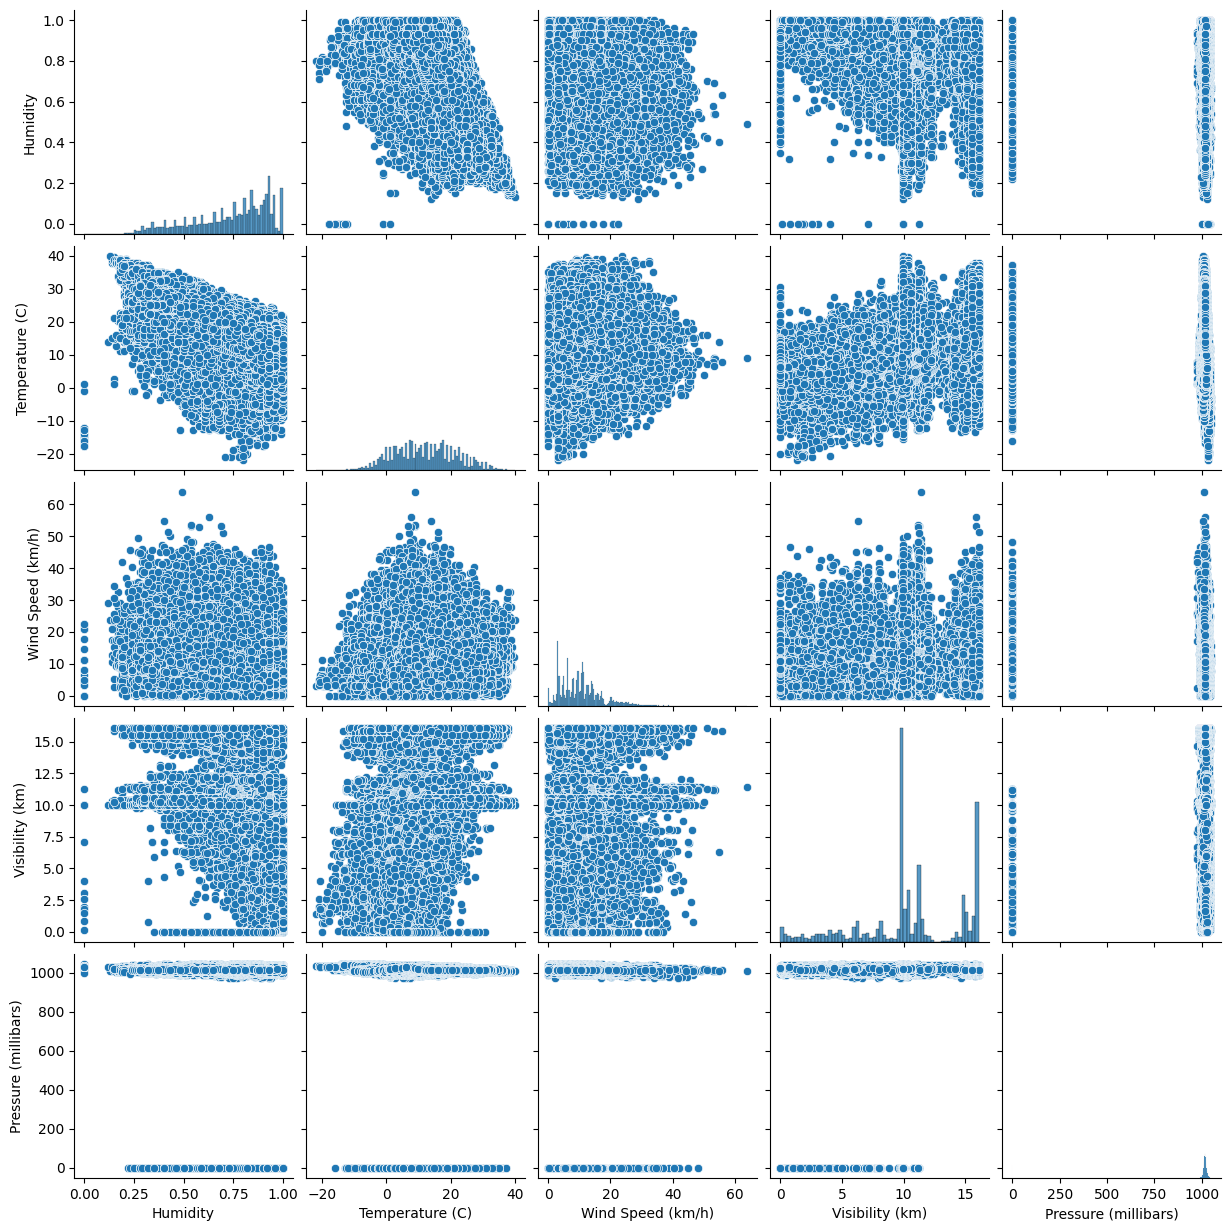

In [55]:
sns.pairplot(X)
plt.show()

In [56]:
correlation_matrix = X.corr()
correlation_matrix

,Humidity,Temperature (C),Wind Speed (km/h),Visibility (km),Pressure (millibars)
Humidity,1.000000,-0.632255,-0.224951,-0.369173,0.005454
Temperature (C),-0.632255,1.000000,0.008957,0.392847,-0.005447
Wind Speed (km/h),-0.224951,0.008957,1.000000,0.100749,-0.049263
Visibility (km),-0.369173,0.392847,0.100749,1.000000,0.059818
Pressure (millibars),0.005454,-0.005447,-0.049263,0.059818,1.000000


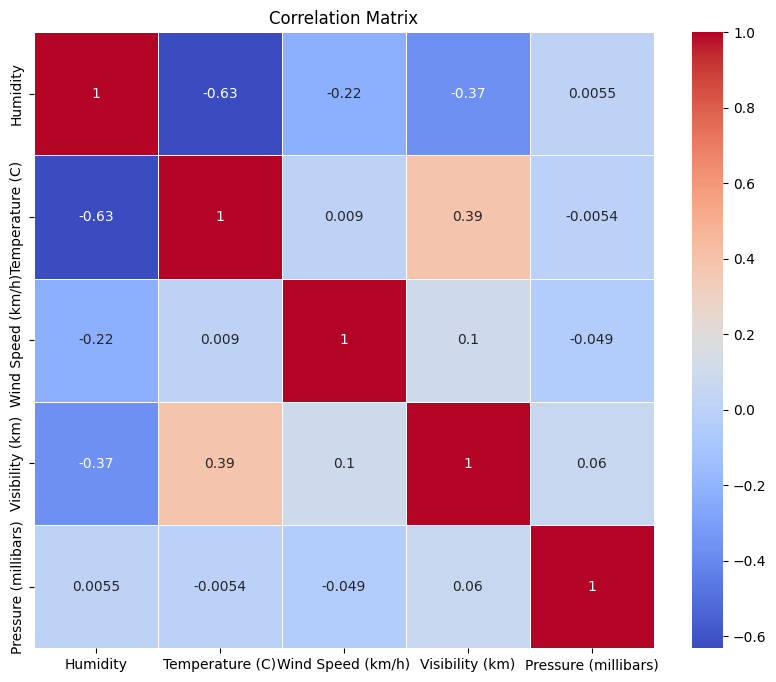

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show() 
# Pairplot: Displays pairwise relationships between features.
#Correlation Matrix & Heatmap: Identifies correlations between features (closer to 1 or -1 indicates strong relationships).


Splitting data into Training and Testing sets

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size = 0.2,random_state = 42)
#Purpose: Split data into training (80%) and testing (20%) sets.
#random_state: Ensures reproducibility by setting a fixed seed.

In [59]:
print('X Train',x_train)
print("      ")
print('X Test',x_test)
print('Y Train',y_train)
print("      ")
print('Y Test',y_test)

X Train        Humidity  Temperature (C)  Wind Speed (km/h)  Visibility (km)  \
43345      0.96        15.438889            10.8675           5.1359   
66832      0.67         6.027778            33.5041          11.3988   
92142      0.97        18.238889             5.7316          14.6832   
24092      0.66        10.227778             3.2200           9.9820   
35372      0.76         7.950000            14.0070           9.9820   
...         ...              ...                ...              ...   
6265       0.84        14.511111             5.1198          14.5866   
54886      0.85        -9.983333             3.0268           6.2146   
76820      0.81         9.350000            10.8836           8.0017   
860        0.82        19.161111             0.7728           9.9820   
15795      0.90         5.000000            10.8192          14.0875   

       Pressure (millibars)  
43345               1014.97  
66832               1010.07  
92142               1010.24  
24092  

Training a linear regression model

In [60]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

Make prediction on test sets

In [ ]:
#predicting base don training
y_test_pred = model.predict(x_test)
print("X_test shape",x_test.shape)
print(y_test_pred.shape)

X_test shape (19291, 5)
(19291,)


In [ ]:
#comapring predicted one with actual
mse = mean_squared_error(y_test,y_test_pred)
r2 = r2_score(y_test,y_test_pred)

print("Mean Square Error", mse)
print("R Square", r2)
#Mean Squared Error (MSE): Measures the average squared difference between actual and predicted values (lower is better).
#R-Squared (R²): Indicates the proportion of variance in the target explained by the model (closer to 1 is better).

Mean Square Error 1.1650617022137442
R Square 0.9899302164737046


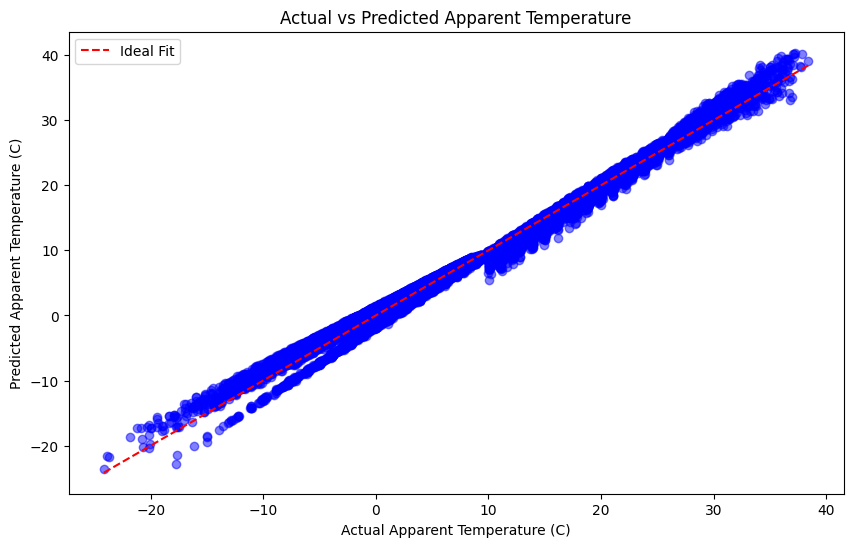

In [63]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, color='blue', alpha=0.5)
plt.xlabel('Actual Apparent Temperature (C)')
plt.ylabel('Predicted Apparent Temperature (C)')
plt.title('Actual vs Predicted Apparent Temperature')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Ideal Fit')
plt.legend()
plt.show()